### Let's make some preparations 
import some libraries, our dataset and check the table 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('sales.csv')
df.head(10)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
5,10006,2024-01-06,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card
7,10008,2024-01-08,Home Appliances,Blueair Classic 480i,2,599.99,1199.98,Europe,PayPal
8,10009,2024-01-09,Clothing,Nike Air Force 1,6,89.99,539.94,Asia,Debit Card
9,10010,2024-01-10,Books,Dune by Frank Herbert,2,25.99,51.98,North America,Credit Card


Our table imported correctly 

#### ______________________________________________________________

### TASK 1: Determine the most popular products
This analysis will help us to understand in wich products costumers focuses in 

                                Product Name  Units Sold Product Category
96                 Hanes ComfortSoft T-Shirt          10         Clothing
186  The Catcher in the Rye by J.D. Salinger           7            Books
233                     Yeti Rambler Tumbler           6           Sports
76            Gap Essential Crewneck T-Shirt           6         Clothing
178           Spalding NBA Street Basketball           6           Sports
136                         Nike Air Force 1           6         Clothing


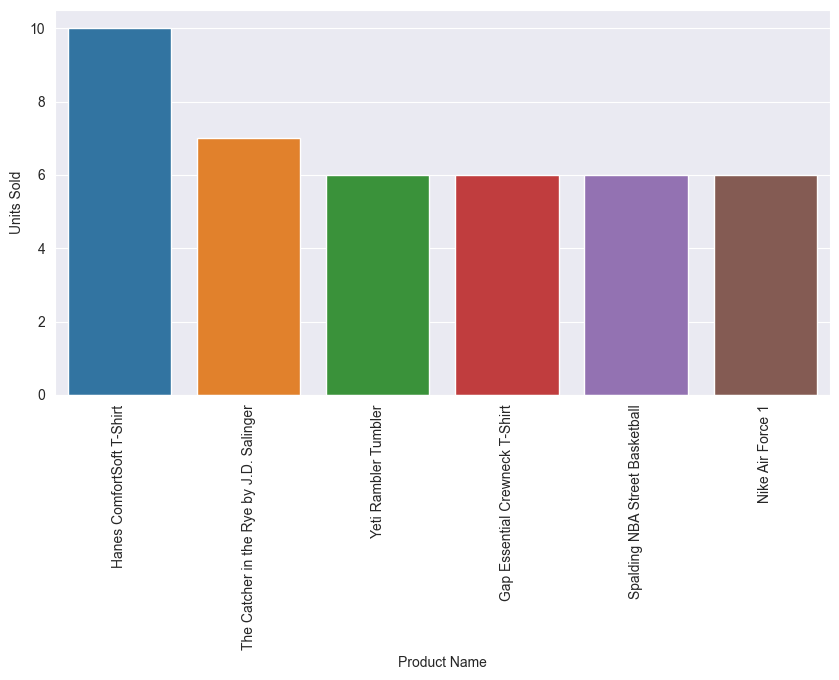

In [44]:
popular_products = df.groupby('Product Name')['Units Sold'].sum().reset_index().merge(df[['Product Name', 'Product Category']], on='Product Name', how='left').drop_duplicates('Product Name')
popular_products = popular_products.sort_values(by='Units Sold', ascending=False).head(6)
print(popular_products)
plt.figure(figsize=(10, 5))
sns.barplot(x='Product Name', y='Units Sold', data=popular_products, hue='Product Name')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

We've determined that the most preferred products are in the Clothing category, but is this the most profitable category?

#### ______________________________________________________________

### TASK 2: Determine total revenue and sales quantity for each product category

In [14]:
total_revenue_sales_quantity = df.groupby('Product Category').agg(
    total_revenue=pd.NamedAgg(column='Total Revenue', aggfunc='sum'),
    total_sales=pd.NamedAgg(column='Units Sold', aggfunc='sum')
)
total_revenue_sales_quantity = total_revenue_sales_quantity.sort_values(by='total_revenue', ascending=False)
print("\nTotal Revenue and Sales Quantity for Each Product Category:\n")
print(total_revenue_sales_quantity)


Total Revenue and Sales Quantity for Each Product Category:

                  total_revenue  total_sales
Product Category                            
Electronics            34982.41           66
Home Appliances        18646.16           59
Sports                 14326.52           88
Clothing                8128.93          145
Beauty Products         2621.90           46
Books                   1861.93          114


We can observe that the sale of clothing does not show the highest revenue. This table is a clear example that the largest number of sales does not mean that there will be the largest profit

Let's find out how much income we received from each category, provided that we receive 25% from each sale?

In [4]:
total_revenue_sales_quantity['profit'] = total_revenue_sales_quantity['total_revenue'] * 0.25
total_revenue_sales_quantity['profit'] = total_revenue_sales_quantity['profit'].round(2)
print(total_revenue_sales_quantity[['total_revenue', 'profit']])


                  total_revenue   profit
Product Category                        
Electronics            34982.41  8745.60
Home Appliances        18646.16  4661.54
Sports                 14326.52  3581.63
Clothing                8128.93  2032.23
Beauty Products         2621.90   655.48
Books                   1861.93   465.48


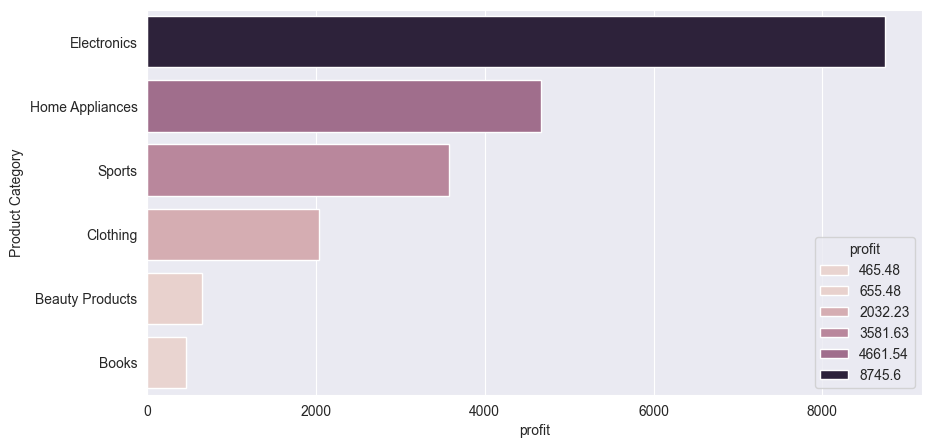

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x= total_revenue_sales_quantity['profit'], y='Product Category', data=total_revenue_sales_quantity, hue='profit')
plt.show()

 We see that we have the biggest profit from the sale of electronics

### TASK 3: What payment method is used most often

This investigation will help us create a special offer or loyalty program for customers who most often use certain payment methods


 Most usable payment methods: 

  Payment Method  Count
0    Credit Card    120
1         PayPal     80
2     Debit Card     40


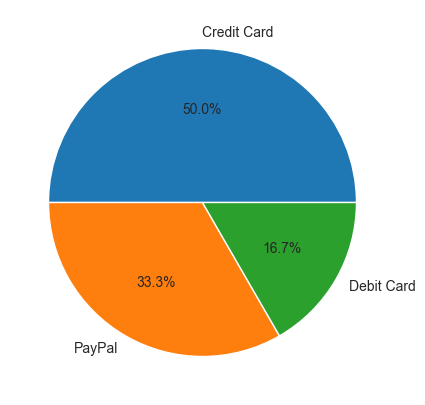

In [6]:
popular_payments = df['Payment Method'].value_counts().reset_index()
popular_payments.columns = ['Payment Method', 'Count']
print('\n Most usable payment methods: \n')
print(popular_payments)
plt.figure(figsize=(5, 5))
plt.pie(popular_payments['Count'], labels=popular_payments['Payment Method'] , autopct='%1.1f%%')
plt.show()

Now we may see, that "Credit Card" is the most preferable payment method. In this case we can think about loyalty programs for this sector. By the way we may also advise some offers for paying by Debit Card for incr. the value for this payment method as well.

#### TASK 4: Let's investigate the regions who buy our staff 

               total_revenue  average  unit_sold
Region                                          
North America       36844.34   204.69        180
Asia                22455.45    96.38        233
Europe              21268.06   202.55        105


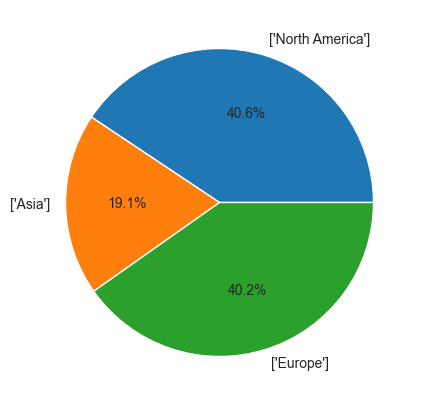

In [43]:
region = df.groupby('Region').agg(
    Region = pd.NamedAgg(column='Region', aggfunc='unique'),
    total_revenue =pd.NamedAgg(column='Total Revenue', aggfunc='sum'),
    unit_sold =pd.NamedAgg(column='Units Sold', aggfunc='sum')
)
region['average'] = region['total_revenue'] / region['unit_sold']
region['average'] = region['average'].round(2)
region = region.sort_values(by= 'total_revenue', ascending=False)
print(region[['total_revenue', 'average', 'unit_sold']])
plt.figure(figsize=(5, 5))
plt.pie(region['average'], labels=region['Region'], autopct='%1.1f%%')
plt.show()


Now we see the main segment of our customers, based on this information we can develop marketing campaigns based on the cultural characteristics of a particular region